In [220]:
# the pandas library with the alias pd, which is commonly used for reading CSV files and performing data cleaning.
import pandas as pd

import numpy as np

#imports the seaborn plotting module with the alias sns, used for creating visualizations.
import seaborn as sns

#imports the seaborn plotting module with the alias sn, used for creating visualizations.
import seaborn as sn

#imports the altair plotting module with the alias plt, used for creating visualizations.
import altair as alt

#imports the Matplotlib plotting module with the alias plt, used for creating visualizations.
import matplotlib.pyplot as plt

# imports the train_test_split function from scikit-learn, used for splitting datasets
#into training and testing sets in machine learning.
from sklearn.model_selection import train_test_split

# imports scikit-learn's preprocessing module, used for preparing and preprocessing data in machine learning workflows.
from sklearn import preprocessing

#imports the KNeighborsClassifier class from scikit-learn, which is used for classification tasks using the k-nearest neighbors algorithm.
from sklearn.neighbors import KNeighborsClassifier

#imports the RandomForestClassifier class from scikit-learn, used for classification tasks using the random forest algorithm.
from sklearn.ensemble import RandomForestClassifier

# imports the LogisticRegression class from scikit-learn, used for logistic regression in binary classification tasks.
from sklearn.linear_model import LogisticRegression

#imports common classification metrics (accuracy, classification report, and confusion matrix)
#from scikit-learn for evaluating machine learning models.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# About this file
The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

# Columns Discription
<br>
gender: <br>
Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.
<br>

age: <br>
Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
<br>

hypertension: <br>
Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0
<br>

heart_disease: <br>
Heart disease is another medical condition that is associated with an increased risk of developing diabetes.
<br>

smoking_history: <br>
Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated
<br>

bmi: <br>
BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk
<br>

HbA1c_level: <br>
HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels
<br>

blood_glucose_level: <br>
Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key
<br>

diabetes: <br>

Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the

In [221]:
# importing the dataset file (diabetes_prediction_dataset)
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [222]:
# A detailed information about each column and its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      99976 non-null   object 
 5   bmi                  99993 non-null   float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  99997 non-null   float64
 8   diabetes             100000 non-null  int64  
 9   bmi and blood        100000 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [223]:
#View the dataset
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi and blood
0,Female,80.0,0,1,never,25.19,6.6,140.0,0,3526.60
1,Female,54.0,0,0,NaN,127.32,6.6,80.0,0,10185.60
2,Male,28.0,0,0,NaN,27.32,5.7,158.0,0,4316.56
3,Female,36.0,0,0,NaN,23.45,5.0,155.0,0,3634.75
4,Male,76.0,1,1,NaN,20.14,4.8,155.0,0,3121.70
...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90.0,0,2458.80
99996,Female,2.0,0,0,No Info,17.37,6.5,100.0,0,1737.00
99997,Male,66.0,0,0,former,27.83,5.7,155.0,0,4313.65
99998,Female,24.0,0,0,never,35.42,4.0,100.0,0,3542.00


## Data cleaning

In [224]:
# to removes duplicate rows from a pandas DataFrame (df).
df=df.drop_duplicates()

## <h6>Filling the sum Values</h6>

In [225]:
#check for missing values
df.isnull().sum()
# smoking_history got 24 missing values
# bmi column got 7 missing values
# and blood_glucose_level column got 3 missing value

gender                  0
age                     0
hypertension            0
heart_disease           0
smoking_history        24
bmi                     7
HbA1c_level             0
blood_glucose_level     3
diabetes                0
bmi and blood           0
dtype: int64

In [226]:
# View the missing values in smoking_history
df['smoking_history'].isnull().sum()
# to check the cells thats having the null values
df[df['smoking_history'].isnull()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi and blood
1,Female,54.0,0,0,NaN,127.32,6.6,80.0,0,10185.60
2,Male,28.0,0,0,NaN,27.32,5.7,158.0,0,4316.56
3,Female,36.0,0,0,NaN,23.45,5.0,155.0,0,3634.75
4,Male,76.0,1,1,NaN,20.14,4.8,155.0,0,3121.70
5,Female,20.0,0,0,NaN,27.32,6.6,85.0,0,2322.20
6,Female,44.0,0,0,NaN,19.31,6.5,200.0,1,3862.00
7,Female,79.0,0,0,NaN,23.86,5.7,85.0,0,2028.10
8,Male,42.0,0,0,NaN,33.64,4.8,145.0,0,4877.80
9,Female,32.0,0,0,NaN,27.32,5.0,100.0,0,2732.00
10,Female,53.0,0,0,NaN,27.32,6.1,85.0,0,2322.20


In [227]:
#This libne of code returns the mode (most frequent value) of the 'smoking_history' column in the pandas DataFrame df.
df['smoking_history'].mode()[0]

'never'

In [228]:
# fill the missing values within smoking_history columns with df['smoking_history'].mode()[0] using fillna() method
# We fill the null value with no info the most repeted value in smoking_history
df['smoking_history'].fillna(df['smoking_history'].mode()[0],inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\1264718989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'].fillna(df['smoking_history'].mode()[0],inplace=True)


In [229]:
#verify the changes
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    7
HbA1c_level            0
blood_glucose_level    3
diabetes               0
bmi and blood          0
dtype: int64

In [230]:
# We will remove the last column because we don't need it
df.drop(['bmi and blood'], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\4172361251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['bmi and blood'], axis=1, inplace=True)


In [231]:
#show dataset
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,never,127.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,never,23.45,5.0,155.0,0
4,Male,76.0,1,1,never,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,124.60,4.8,145.0,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100.0,0
99997,Male,66.0,0,0,former,27.83,5.7,155.0,0
99998,Female,24.0,0,0,never,35.42,4.0,100.0,0


In [232]:
# fill the missing values within bmi columns with mean()
# We fill the null value with mean()
df['bmi'].fillna(df['bmi'].mean(),inplace=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_6740\2731251252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'].fillna(df['bmi'].mean(),inplace=True)


In [233]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    3
diabetes               0
dtype: int64

In [234]:
# fill the missing values within blood_glucose_level columns with median()
# We fill the null value with median()
df['blood_glucose_level'].fillna(df['blood_glucose_level'].mean(),inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\2489075821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blood_glucose_level'].fillna(df['blood_glucose_level'].mean(),inplace=True)


In [235]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96151 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96151 non-null  object 
 1   age                  96151 non-null  float64
 2   hypertension         96151 non-null  int64  
 3   heart_disease        96151 non-null  int64  
 4   smoking_history      96151 non-null  object 
 5   bmi                  96151 non-null  float64
 6   HbA1c_level          96151 non-null  float64
 7   blood_glucose_level  96151 non-null  float64
 8   diabetes             96151 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 7.3+ MB


## Detect and Remove Outliers

In [237]:
# statistical details for each column in the dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96151.000000,96151.000000,96151.000000,96151.000000,96151.000000,96151.000000,96151.000000
mean,41.794804,0.077597,0.040800,27.326181,5.532633,138.246245,0.088215
std,22.462730,0.267537,0.197829,6.808678,1.073218,41.272454,0.283609
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,154.700000,9.000000,1500.000000,1.000000


In [238]:
# Replace 'Other' with the mode of the 'gender' column
df['gender'] = df['gender'].replace('Other', df['gender'].mode()[0])

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\766698287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace('Other', df['gender'].mode()[0])


In [239]:
len(df[df['gender']=='Other'])

0

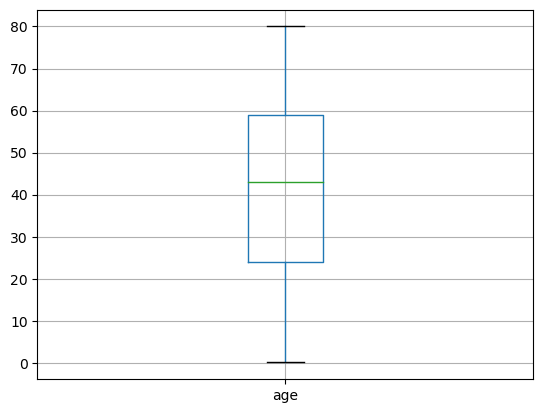

In [240]:
# to see the Outliers for the Age Column 
df.boxplot('age')
plt.show()
#no outliner

In [241]:
# to see Outliers clearly 
df['gender'].unique()
#no outliner

array(['Female', 'Male'], dtype=object)

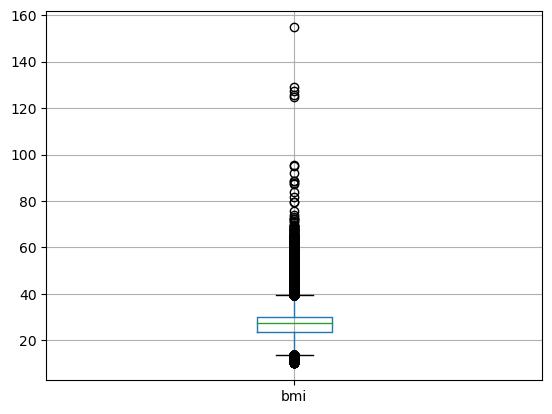

In [242]:
# to see Outliers clearly 
df.boxplot('bmi')
plt.show('bmi')

## Using IQR to Detect the row

In [243]:
def outlier(col):
    Q1  =   df[col].quantile(0.25) 
    Q3  =   df[col].quantile(0.75)
    IQR =   Q3 - Q1
    LB  =   Q1 - 1.5 * IQR
    UB  =   Q3 + 1.5 * IQR
    return LB,UB

In [244]:
l,u = outlier('bmi')
print(f"The Lower Bound = {l}, and the Upper Bound {u}")

The Lower Bound = 13.709999999999997, and the Upper Bound 39.55


In [245]:
# to find values not in between (lower Bound) & (Ubber Bound)
df[~df['bmi'].between(l,u)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,never,127.32,6.6,80.000000,0
11,Female,54.0,0,0,never,154.70,6.0,138.246245,0
59,Female,67.0,0,0,never,63.48,8.8,155.000000,1
93,Male,38.0,0,0,never,55.61,6.5,130.000000,0
98,Female,30.0,0,0,No Info,50.13,6.0,100.000000,0
...,...,...,...,...,...,...,...,...,...
99960,Female,47.0,0,0,former,45.15,4.0,126.000000,0
99986,Female,63.0,0,0,never,129.01,4.8,145.000000,0
99988,Male,19.0,0,0,No Info,125.75,5.0,145.000000,0
99993,Female,40.0,0,0,never,40.69,3.5,155.000000,0


## Impute the Outliers

In [246]:
df.loc[~(df['bmi'].between(l,u)), ['bmi']] = df['bmi'].median()

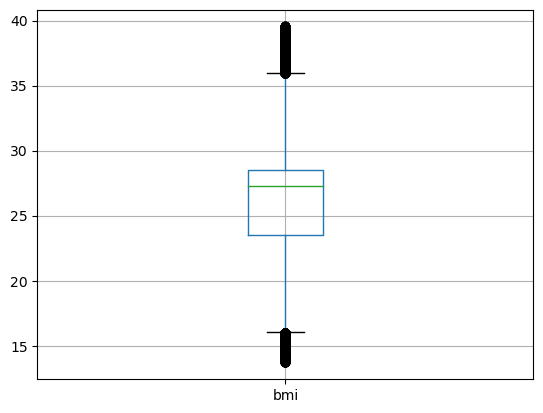

In [247]:
# to check the outlier 
df.boxplot('bmi')
plt.show()

In [248]:
# to find whos not in between
df[~df['bmi'].between(l,u)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


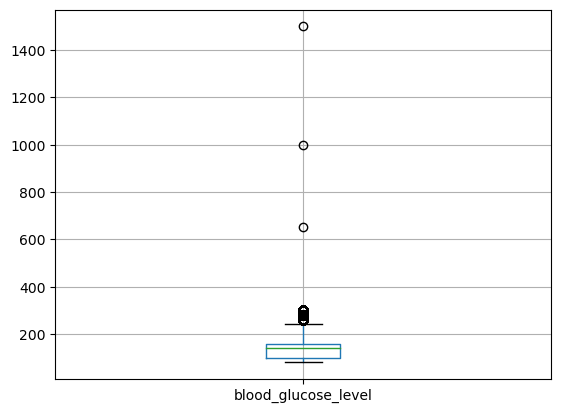

In [249]:
# to check the outlier 
df.boxplot('blood_glucose_level')
plt.show()

In [250]:
l,u = outlier('blood_glucose_level')
print(f"The Lower Bound = {l}, and the Upper Bound {u}")

The Lower Bound = 11.5, and the Upper Bound 247.5


In [251]:
# to find whos not in between
df[~df['blood_glucose_level'].between(l,u)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
38,Male,50.0,1,0,current,27.32,5.7,260.0,1
46,Female,29.0,0,0,never,19.95,5.0,1000.0,0
56,Male,30.0,0,0,No Info,27.32,6.6,1500.0,0
70,Male,7.0,0,0,No Info,15.94,5.8,654.0,0
94,Female,60.0,0,0,never,27.32,7.5,300.0,1
...,...,...,...,...,...,...,...,...,...
99763,Female,50.0,0,0,never,35.91,6.0,280.0,1
99826,Male,63.0,0,1,No Info,27.32,6.6,300.0,1
99867,Male,64.0,1,0,former,33.12,5.7,300.0,1
99938,Male,55.0,0,1,former,30.42,6.2,300.0,1


## Impute the Outliers

In [252]:
# Imputing Outliers with its median
df.loc[~(df['blood_glucose_level'].between(l,u)), ['blood_glucose_level']] = df['blood_glucose_level'].median()

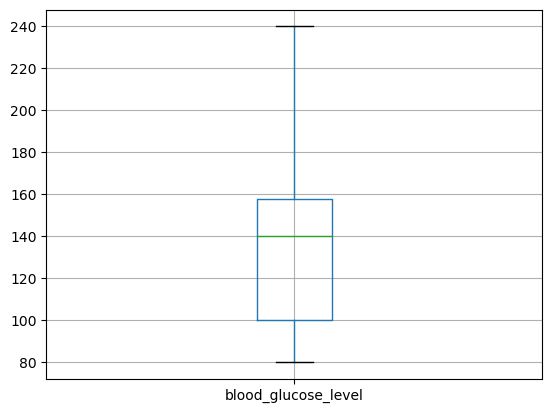

In [253]:
# to check the outlier 
df.boxplot('blood_glucose_level')
plt.show()

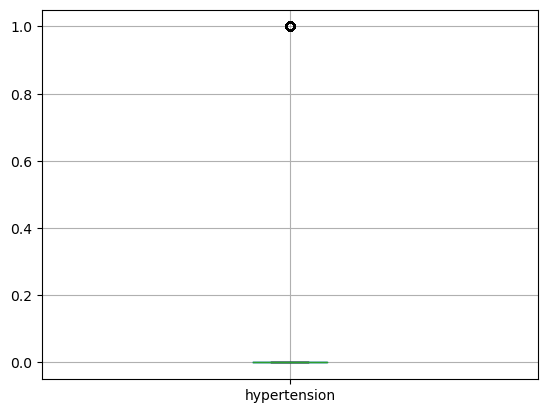

In [254]:
# to check the outlier 
df.boxplot('hypertension')
plt.show()

In [255]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

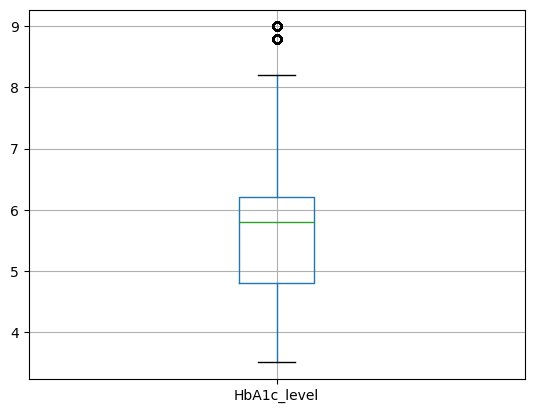

In [256]:
# to check the outlier 
df.boxplot('HbA1c_level')
plt.show()

In [257]:
df['HbA1c_level'].unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

In [258]:
l,u = outlier('HbA1c_level')
print(f"The Lower Bound = {l}, and the Upper Bound {u}")

The Lower Bound = 2.6999999999999993, and the Upper Bound 8.3


In [259]:
# to find whos not in between
df[~df['HbA1c_level'].between(l,u)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
40,Male,73.0,0,0,former,25.91,9.0,160.0,1
55,Male,50.0,0,0,former,37.16,9.0,159.0,1
59,Female,67.0,0,0,never,27.32,8.8,155.0,1
135,Male,80.0,0,0,never,22.06,9.0,155.0,1
169,Female,61.0,0,0,not current,39.36,9.0,140.0,1
...,...,...,...,...,...,...,...,...,...
99523,Female,80.0,1,1,current,19.25,8.8,200.0,1
99663,Male,80.0,0,0,No Info,34.00,9.0,140.0,1
99706,Male,54.0,1,0,current,23.06,9.0,126.0,1
99740,Male,80.0,0,1,never,25.76,9.0,220.0,1


In [260]:
df.loc[~(df['HbA1c_level'].between(l,u)), ['HbA1c_level']] = df['HbA1c_level'].mean()

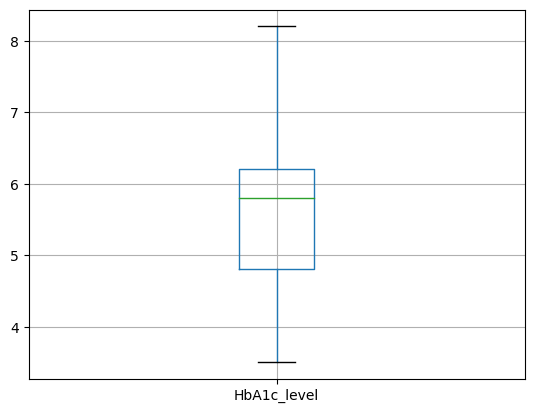

In [261]:
# to check the outlier 
df.boxplot('HbA1c_level')
plt.show()

In [262]:
# some of the columns are not showing becuase of the invalid datatype and
# there is an outliers in smoking_history column

In [263]:
df['smoking_history'].unique()
# these outliers found '####','???'

array(['never', 'not current', 'former', 'No Info', 'current', '???',
       '###', 'ever'], dtype=object)

In [264]:
# Replaces all occurrences of '???' in the 'smoking_history' column with the value 'ever'.
df['smoking_history'] = df['smoking_history'].replace('???','ever')
# Replaces all occurrences of '###' in the 'smoking_history' column with the value 'never'.
df['smoking_history'] = df['smoking_history'].replace('###','never')

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\1235001831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace('???','ever')
C:\Users\PC\AppData\Local\Temp\ipykernel_6740\1235001831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace('###','never')


In [265]:
# to check smoking_history
df['smoking_history'].unique()

array(['never', 'not current', 'former', 'No Info', 'current', 'ever'],
      dtype=object)

# Exploratory Data Analysis (EDA)

## <b>Mean</b>

In [266]:
df.mean(numeric_only=True)

age                     41.794804
hypertension             0.077597
heart_disease            0.040800
bmi                     26.461232
HbA1c_level              5.486693
blood_glucose_level    135.252475
diabetes                 0.088215
dtype: float64

## <b>Median</b>

In [267]:
df.median(numeric_only=True)

age                     43.00
hypertension             0.00
heart_disease            0.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
dtype: float64

## <b> Mode</b>
<i> [0]</i> to get the first index

In [268]:
df.mode().iloc[0]

gender                 Female
age                      80.0
hypertension                0
heart_disease               0
smoking_history         never
bmi                     27.32
HbA1c_level               6.6
blood_glucose_level     140.0
diabetes                    0
Name: 0, dtype: object

## Variance

In [269]:
df.var(numeric_only=True,ddof=0)

age                     504.568998
hypertension              0.071575
heart_disease             0.039136
bmi                      25.906754
HbA1c_level               0.994869
blood_glucose_level    1232.538243
diabetes                  0.080433
dtype: float64

## Standard Deviation

In [270]:
df.std(numeric_only=True)

age                    22.462730
hypertension            0.267537
heart_disease           0.197829
bmi                     5.089894
HbA1c_level             0.997437
blood_glucose_level    35.107707
diabetes                0.283609
dtype: float64

In [271]:
# stats of the numeric Columns
df.describe()
# We got  count, mean, standard deviation, min, max and Q1-Q2-Q3 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96151.000000,96151.000000,96151.000000,96151.000000,96151.000000,96151.000000,96151.000000
mean,41.794804,0.077597,0.040800,26.461232,5.486693,135.252475,0.088215
std,22.462730,0.267537,0.197829,5.089894,0.997437,35.107707,0.283609
min,0.080000,0.000000,0.000000,13.710000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.500000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,28.490000,6.200000,158.000000,0.000000
max,80.000000,1.000000,1.000000,39.550000,8.200000,240.000000,1.000000


In [272]:
# stats of the object Columns
df.describe(include='O')

,gender,smoking_history
count,96151,96151
unique,2,6
top,Female,never
freq,56183,34413


In [273]:
# correlation between variables
df.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\751765766.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257294,0.238443,0.399834,0.074954,0.061699,0.264915
hypertension,0.257294,1.000000,0.119985,0.135504,0.057024,0.046374,0.195713
heart_disease,0.238443,0.119985,1.000000,0.072320,0.047161,0.035567,0.170714
bmi,0.399834,0.135504,0.072320,1.000000,0.048366,0.039374,0.171252
HbA1c_level,0.074954,0.057024,0.047161,0.048366,1.000000,0.065658,0.289196
blood_glucose_level,0.061699,0.046374,0.035567,0.039374,0.065658,1.000000,0.222905
diabetes,0.264915,0.195713,0.170714,0.171252,0.289196,0.222905,1.000000


## Getting the Correlation with Diabetes Column

In [274]:
df.corr()['diabetes']

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\2188251791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['diabetes']


age                    0.264915
hypertension           0.195713
heart_disease          0.170714
bmi                    0.171252
HbA1c_level            0.289196
blood_glucose_level    0.222905
diabetes               1.000000
Name: diabetes, dtype: float64

## Visualize the correlation between the variables

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\1277141430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot= True)


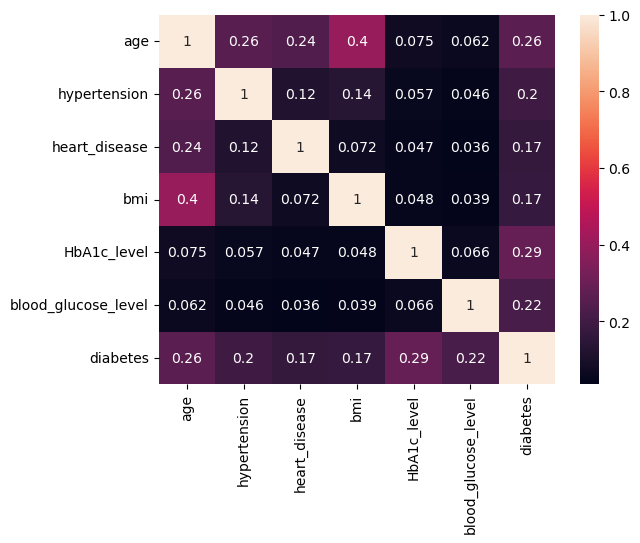

In [275]:
sn.heatmap(df.corr(),annot= True)
plt.show()

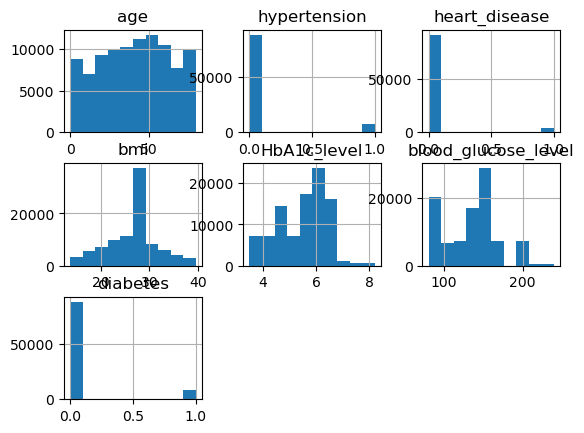

In [276]:
df.hist()
plt.show()

# <small> we are getting 5.52750 because we have imputed the bmi </small>

##  Barchart

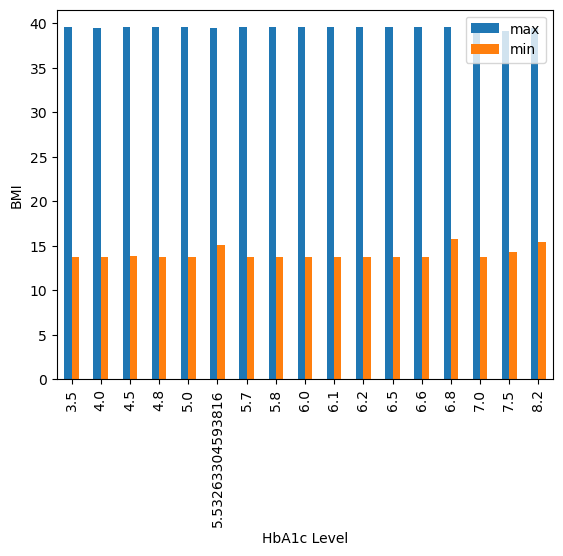

In [277]:
# This code groups the DataFrame df by the 'HbA1c_level' column, calculates
# the maximum and minimum values of the 'bmi' column for each group, and then plots a bar chart.
# The x-axis represents 'HbA1c Level', the y-axis represents 'BMI',
# and each bar shows the range of BMI values (from minimum to maximum) for each HbA1c level. Finally, the chart is displayed.
df.groupby('HbA1c_level')['bmi'].agg([max, min]).plot(kind='bar')
plt.xlabel('HbA1c Level')
plt.ylabel('BMI')
plt.show()

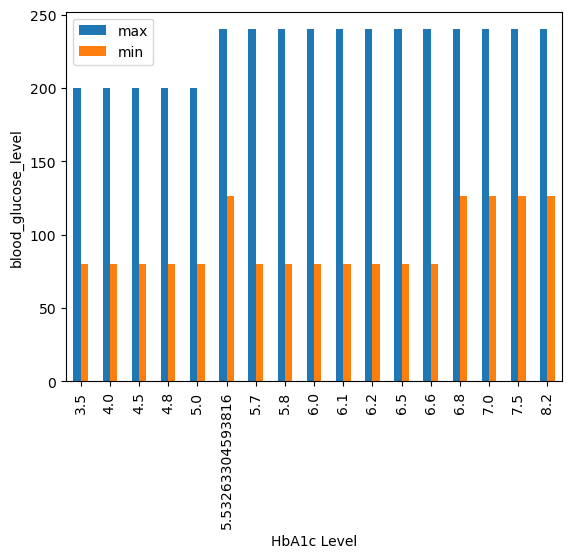

In [278]:
# This code groups the DataFrame df by the 'HbA1c_level' column, calculates the maximum and minimum values
# of the 'blood_glucose_level' column for each group, and then plots a bar chart.
# The x-axis represents 'HbA1c Level', the y-axis represents 'blood_glucose_level',
# and each bar shows the range of blood glucose values (from minimum to maximum) for each HbA1c level. Finally, the chart is displayed.
df.groupby('HbA1c_level')['blood_glucose_level'].agg([max, min]).plot(kind='bar')
plt.xlabel('HbA1c Level')
plt.ylabel('blood_glucose_level')
plt.show()

## PieChart

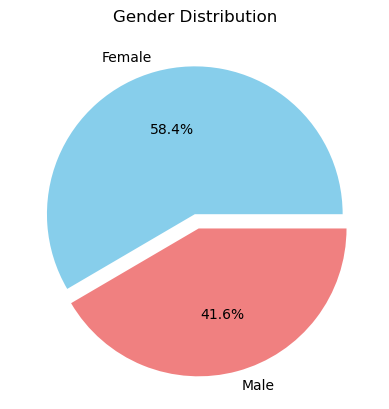

In [279]:
# Plotting the pie chart
#This code creates a pie chart to show the distribution of gender in the DataFrame df,
#with percentage labels, an explosion effect for the second category, and custom colors.
#The chart is titled 'Gender Distribution'
df['gender'].value_counts().plot(kind='pie', autopct="%1.1f%%", explode=[0, 0.1], colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

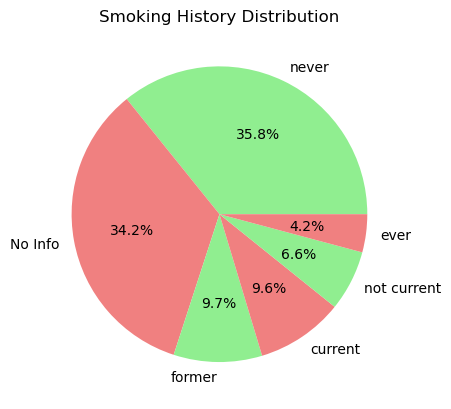

In [280]:
# Plotting the pie chart for smoking history
# This code generates a pie chart to visualize the distribution of 'smoking_history'
# in the DataFrame df. It includes percentage labels, uses specific colors,
#and sets the title to 'Smoking History Distribution'.
df['smoking_history'].value_counts().plot(kind='pie', autopct="%2.1f%%", colors=['lightgreen', 'lightcoral'])
plt.title('Smoking History Distribution')
plt.ylabel('') 
plt.show()

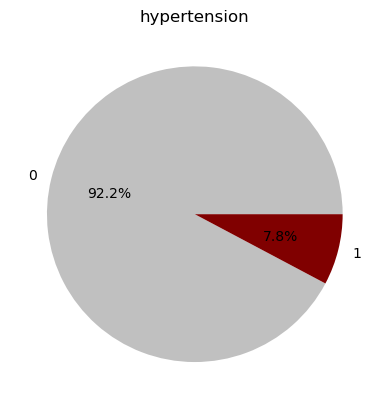

In [281]:
# Plotting the pie chart for hypertension
# This code creates a pie chart to display the distribution of 'hypertension' values in the DataFrame df.
#The chart includes percentage labels, uses specific colors, sets the title to 'Hypertension'.
df['hypertension'].value_counts().plot(kind='pie', autopct="%2.1f%%", colors=['Silver', 'Maroon'])
plt.title('hypertension')
plt.ylabel('') 
plt.show()

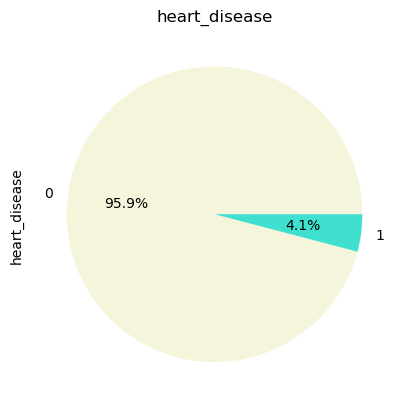

In [282]:
# Plotting the pie chart for heart_disease
# This code generates a pie chart to depict the distribution of 'heart_disease' values in the DataFrame df.
# The chart includes percentage labels, uses specific colors ('Beige' and 'Turquoise'), and sets the title to 'Heart Disease'.
df['heart_disease'].value_counts().plot(kind='pie', autopct="%2.1f%%", colors=['Beige', 'Turquoise'])
plt.title('heart_disease')
plt.show()

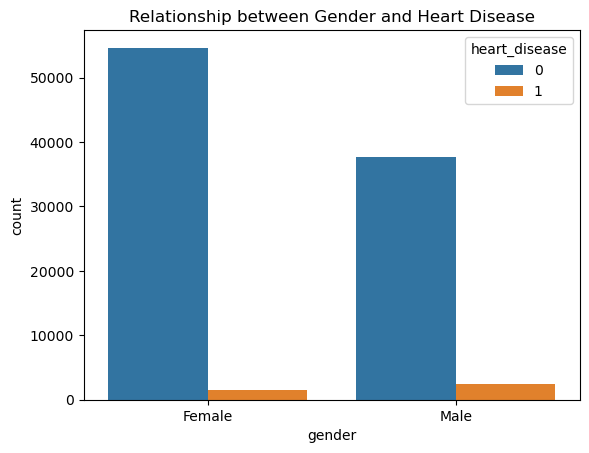

In [283]:
#This code generates a count plot to show the relationship between 'gender' and 'heart_disease' in the DataFrame df.
# The plot is titled 'Relationship between Gender and Heart Disease'.
sns.countplot(x='gender', hue='heart_disease', data=df)
plt.title('Relationship between Gender and Heart Disease')
plt.show()

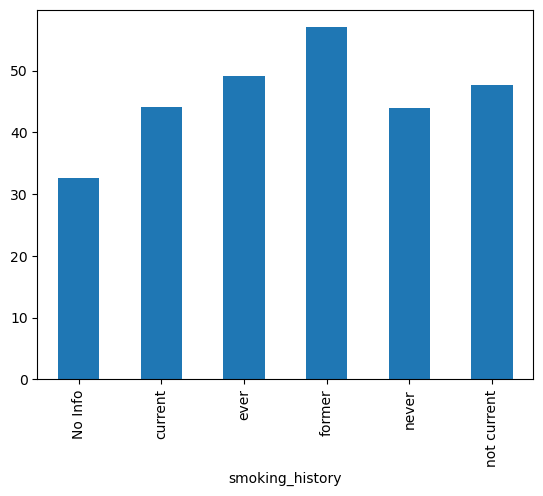

In [284]:
#This code generates a bar chart to display the average age for each 'smoking_history' category in the DataFrame df.
df.groupby("smoking_history")["age"].mean(numeric_only=True).plot(kind = "bar")
plt.show()

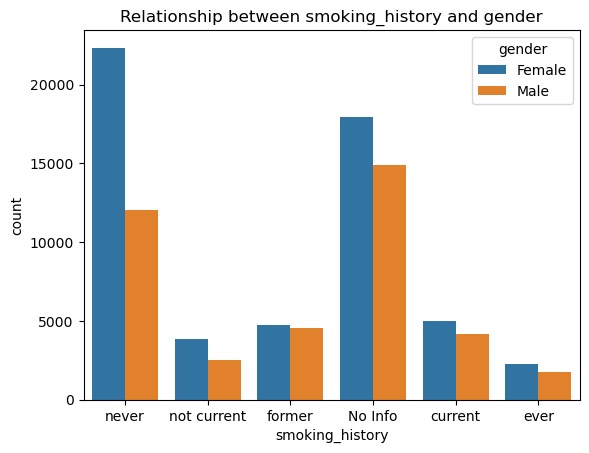

In [285]:
#This code visualizes the distribution of 'smoking_history' categories across different 'gender'
# groups using a Seaborn count plot. The title is set to 'Relationship between Smoking History and Gender'.
sn.countplot(x='smoking_history', hue='gender', data=df)
plt.title('Relationship between smoking_history and gender')
plt.show()

## Line Graph

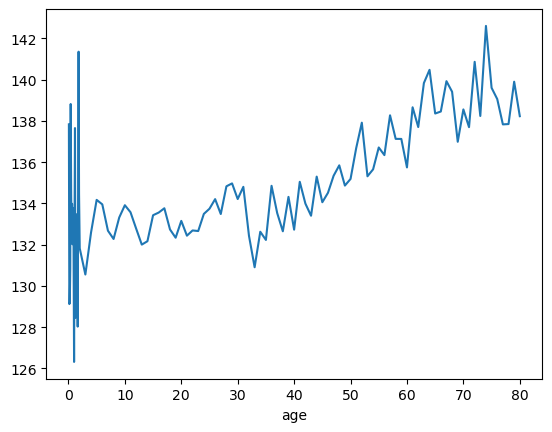

In [286]:
#This code generates a line plot to illustrate the average 'blood_glucose_level' across different 'age'
# groups in the DataFrame df.
df.groupby("age")["blood_glucose_level"].mean().plot(kind = "line")
plt.show()

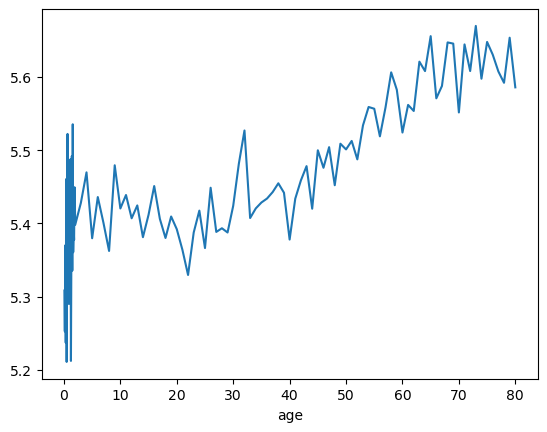

In [287]:
# This code creates a line plot to visualize the average 'HbA1c_level' across different 'age' groups in the DataFrame df.
df.groupby("age")["HbA1c_level"].mean().plot(kind = "line")
plt.show()

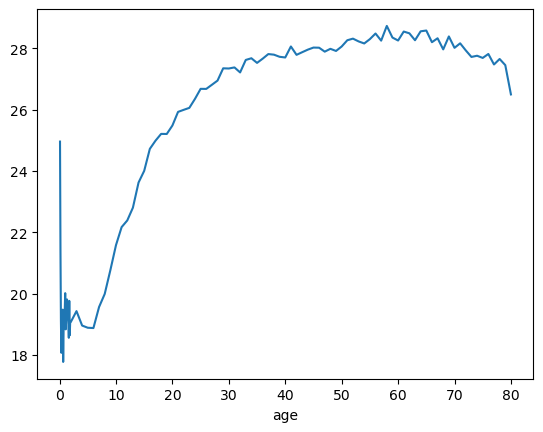

In [288]:
#This code produces a line plot to demonstrate the average 'bmi' across various age groups in the DataFrame df.
df.groupby("age")["bmi"].mean().plot(kind = "line")
plt.show()

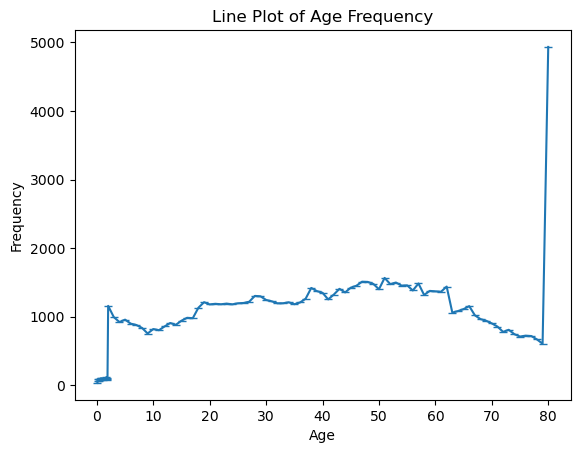

In [289]:
# Line plot
#This code creates a line plot to show the frequency distribution of ages in the DataFrame df.
#Each age is marked on the x-axis, and the corresponding frequency is represented on the y-axis.
age_counts = df['age'].value_counts().sort_index()

plt.plot(age_counts.index, age_counts.values, marker='_')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Line Plot of Age Frequency')

plt.show()

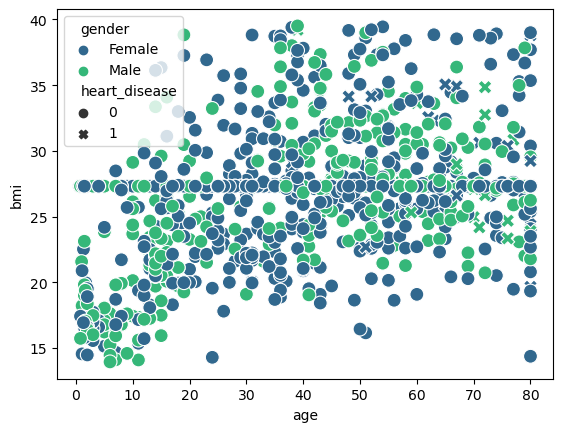

In [290]:
#This code randomly selects 1000 records from the DataFrame df and creates a scatter plot using Seaborn.
#The x-axis shows 'age', the y-axis shows 'bmi', points are colored by 'gender', styled by 'heart_disease',
#and a viridis color palette is used. Each point is displayed with a marker size of 100.

# Sample 1000 records from the DataFrame
df_sample = df.sample(n=1000, random_state=42)

# Create a scatter plot using the sampled data
sns.scatterplot(data=df_sample, x='age', y='bmi', hue='gender', style='heart_disease', palette='viridis', s=100)
plt.show()

In [291]:
#This Altair code creates a scatter plot using a circle mark, visualizing age on the x-axis,
#BMI on the y-axis, with tooltips for gender, age, BMI, and HbA1c_level.
#The size of the circles corresponds to HbA1c_level, and circles are colored by gender.
#The resulting interactive chart is displayed using Altair.

# Altair Chart
chart = alt.Chart(df_sample).mark_circle().encode(
    x='age:Q',
    y='bmi:Q',
    tooltip=['gender', 'age', 'bmi', 'HbA1c_level'],
    size='HbA1c_level:Q',
    color='gender:N'
).interactive()

# Show the chart
chart

alt.Chart(...)

In [292]:
#This Altair code creates a scatter plot using points, where the x-axis represents 'blood_glucose_level',
#the y-axis represents 'HbA1c_level'. The chart is faceted by 'gender',
#meaning separate plots are generated for each gender. The color of the points is determined by the 'diabetes' variable.
#Tooltip information includes 'blood_glucose_level' and 'HbA1c_level'.
#The resulting interactive chart is displayed using Altair.

# Scatter plot using Altair with faceting
scatter_plot = alt.Chart(df_sample).mark_point().encode(
    x=alt.X('blood_glucose_level:Q', title='Blood Glucose Level'),
    y=alt.Y('HbA1c_level:Q', title='HbA1c Level'),
    tooltip=['blood_glucose_level:Q', 'HbA1c_level:Q'],
    color='diabetes:N'
).facet(
    column='gender:N'
).interactive()

# Show the chart
scatter_plot

alt.FacetChart(...)

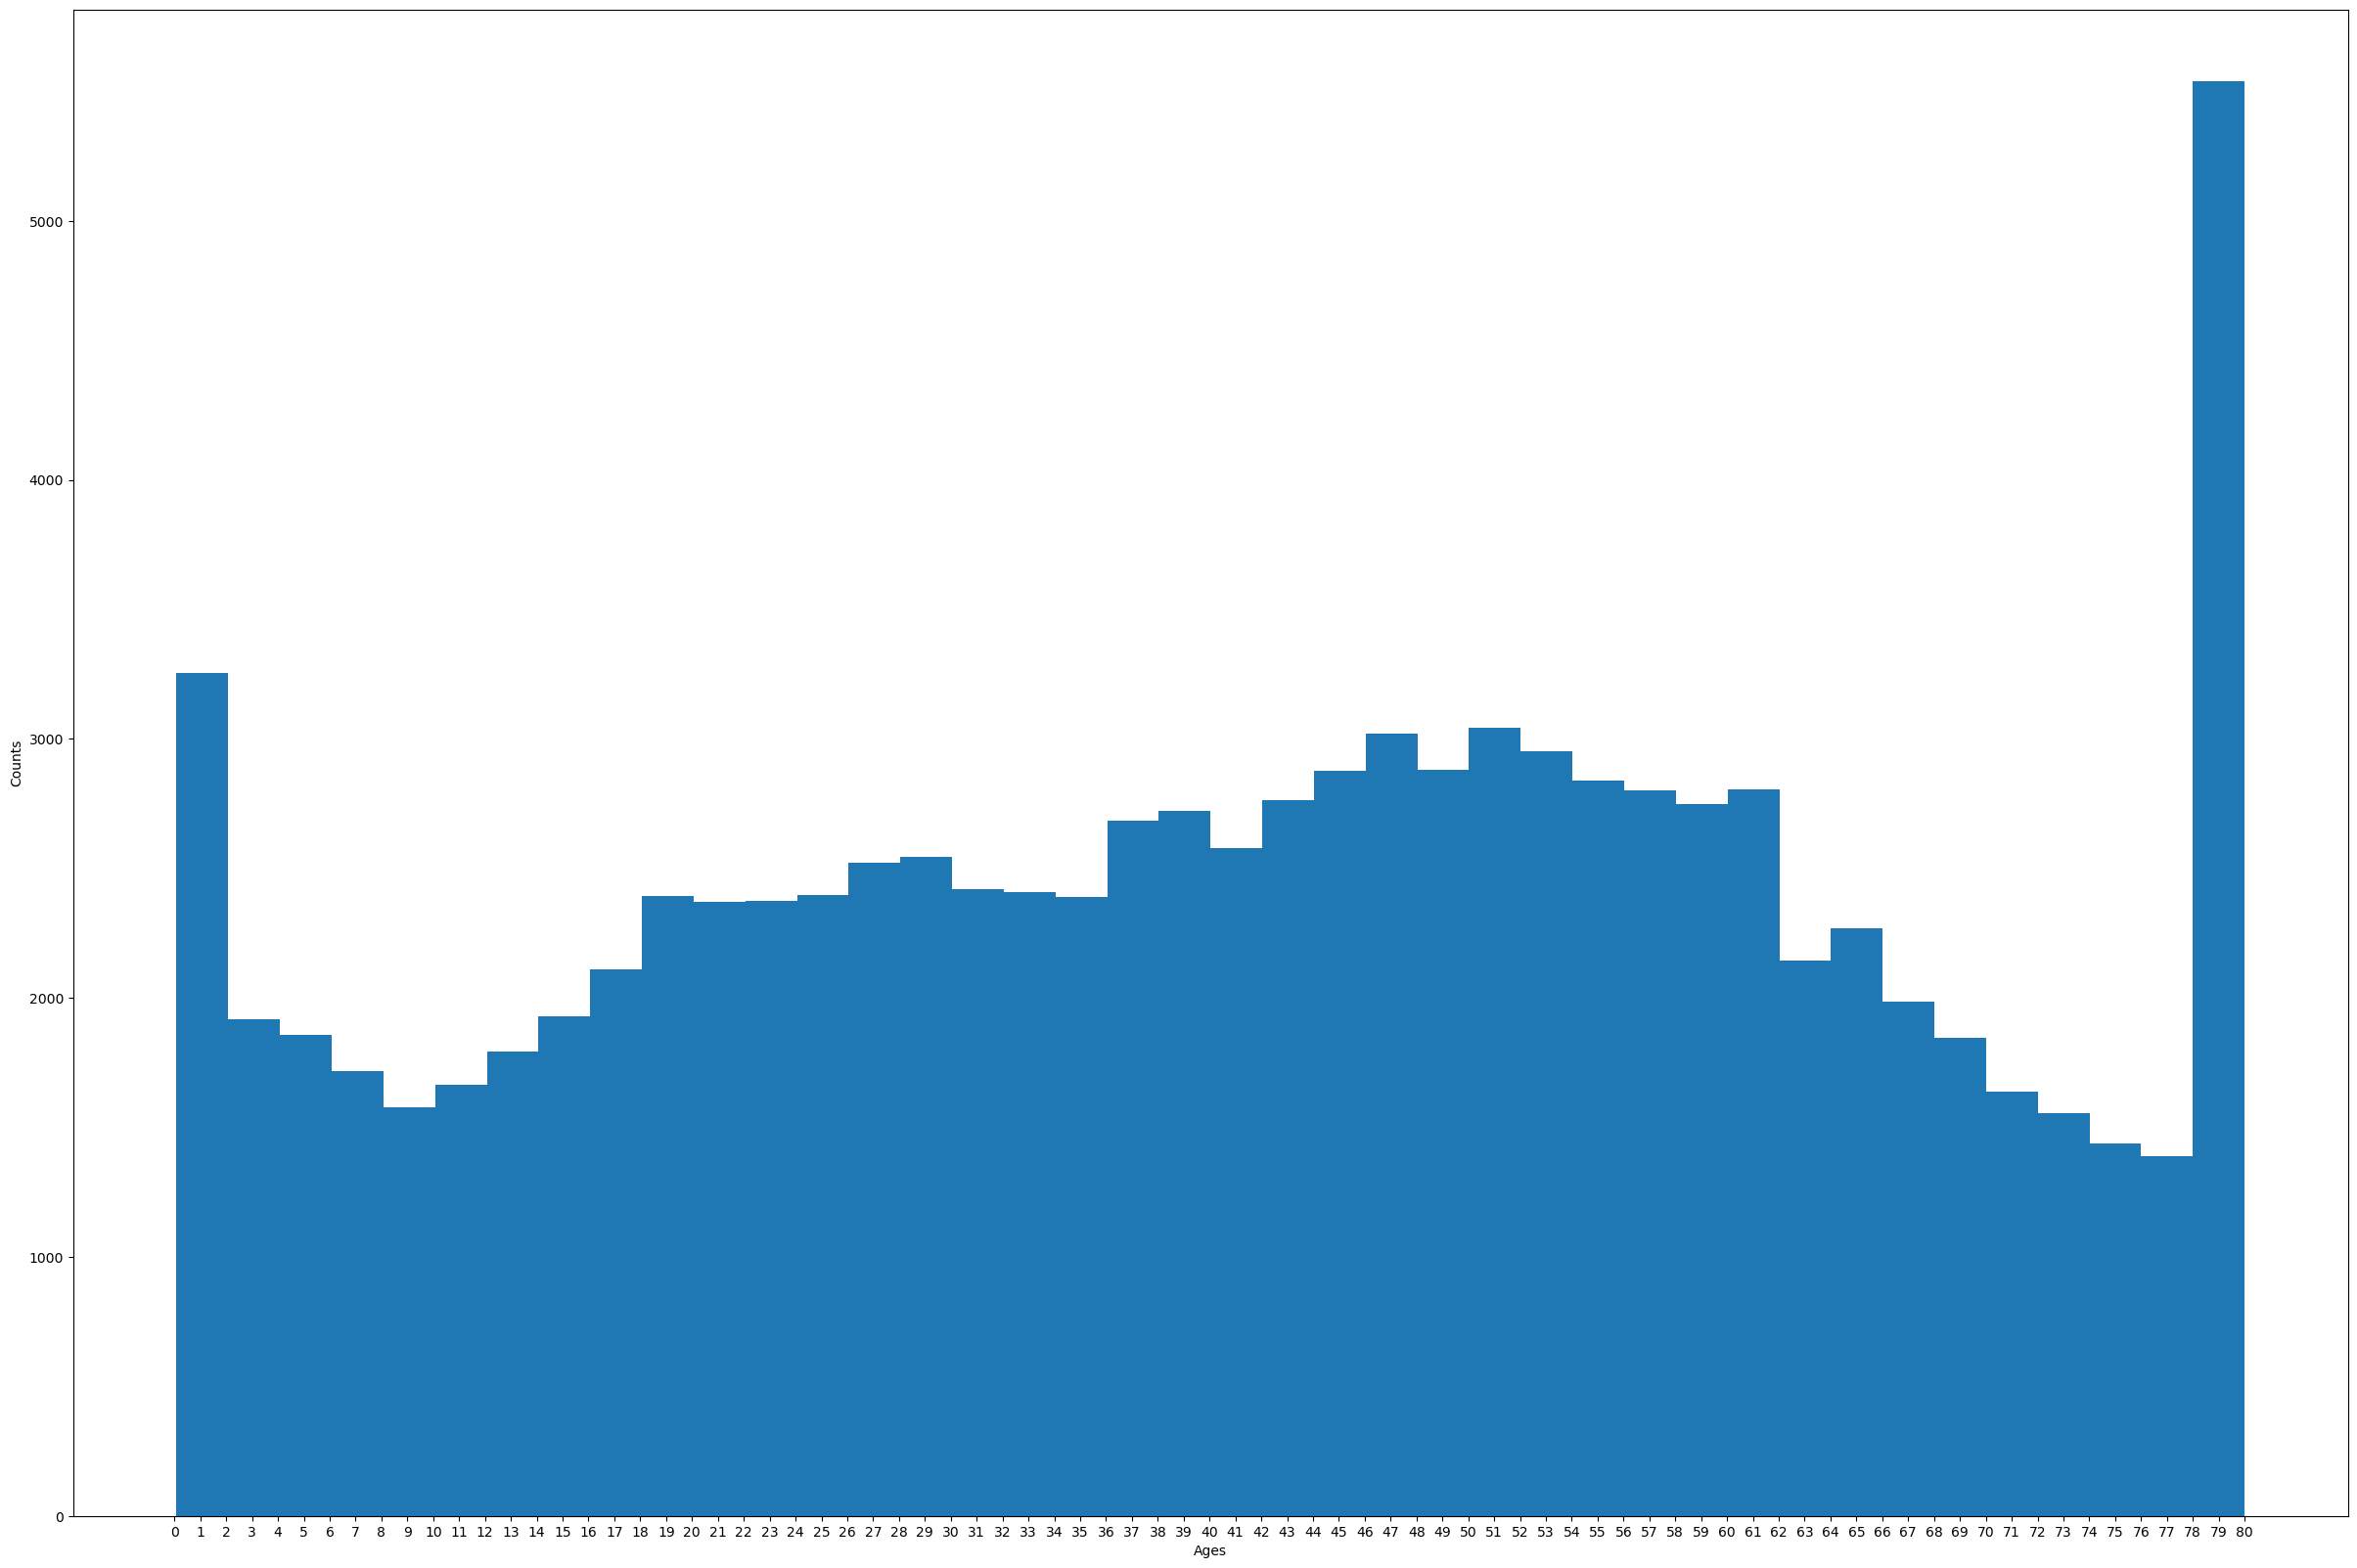

In [293]:
#This code creates a histogram to visualize the distribution of ages in the DataFrame df.
#The x-axis represents age bins, and the y-axis represents the count of individuals within each age bin.
#The figure size is set to 30 by 20 inches, and the histogram is divided into 40 bins.
#X-axis ticks are set for each year up to 80.

# Age 
plt.figure(figsize = [30,20]);
plt.hist(df['age'], bins = 40);
plt.xlabel('Ages');
plt.ylabel('Counts');
plt.xticks(np.arange(0,81,1));
plt.show()

In [294]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,never,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,never,23.45,5.0,155.0,0
4,Male,76.0,1,1,never,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,27.32,4.8,145.0,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100.0,0
99997,Male,66.0,0,0,former,27.83,5.7,155.0,0
99998,Female,24.0,0,0,never,35.42,4.0,100.0,0


In [295]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Sperating features X and target y

In [296]:
X = df.iloc[:,:-1]
X 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140.0
1,Female,54.0,0,0,never,27.32,6.6,80.0
2,Male,28.0,0,0,never,27.32,5.7,158.0
3,Female,36.0,0,0,never,23.45,5.0,155.0
4,Male,76.0,1,1,never,20.14,4.8,155.0
...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,27.32,4.8,145.0
99996,Female,2.0,0,0,No Info,17.37,6.5,100.0
99997,Male,66.0,0,0,former,27.83,5.7,155.0
99998,Female,24.0,0,0,never,35.42,4.0,100.0


In [297]:
y = df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96151, dtype: int64

## Model 1: Logistic regression

Logistic regression will provide you with a probability score between 0 and 1, and you can set a threshold (e.g., 0.5) to classify instances into the two classes. If the predicted probability is greater than or equal to the threshold, you classify the instance as 1 (has diabetes); otherwise, you classify it as 0 (does not have diabetes).

In [298]:
#Encoding categorical data using One-Hot Encoding because:
#The categorical feature is not ordinal
#The number of categorical features is less so one-hot encoding can be effectively applied

X = pd.get_dummies(X,columns=['gender'])
X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male
0,80.0,0,1,never,25.19,6.6,140.0,1,0
1,54.0,0,0,never,27.32,6.6,80.0,1,0
2,28.0,0,0,never,27.32,5.7,158.0,0,1
3,36.0,0,0,never,23.45,5.0,155.0,1,0
4,76.0,1,1,never,20.14,4.8,155.0,0,1
...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,No Info,27.32,4.8,145.0,1,0
99996,2.0,0,0,No Info,17.37,6.5,100.0,1,0
99997,66.0,0,0,former,27.83,5.7,155.0,0,1
99998,24.0,0,0,never,35.42,4.0,100.0,1,0


In [299]:
#Label Encoding applied becuase :
#The number of categories is quite large as one-hot encoding can lead to high memory consumption

lab = preprocessing.LabelEncoder()
X['smoking_history'] = lab.fit_transform(X['smoking_history'])
X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male
0,80.0,0,1,4,25.19,6.6,140.0,1,0
1,54.0,0,0,4,27.32,6.6,80.0,1,0
2,28.0,0,0,4,27.32,5.7,158.0,0,1
3,36.0,0,0,4,23.45,5.0,155.0,1,0
4,76.0,1,1,4,20.14,4.8,155.0,0,1
...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,0,27.32,4.8,145.0,1,0
99996,2.0,0,0,0,17.37,6.5,100.0,1,0
99997,66.0,0,0,3,27.83,5.7,155.0,0,1
99998,24.0,0,0,4,35.42,4.0,100.0,1,0


In [300]:
X['smoking_history'].unique()

array([4, 5, 3, 0, 1, 2])

In [301]:
#calculates the correlation matrix for the planets DataFrame. 
df.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_6740\2369210902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257294,0.238443,0.399834,0.074954,0.061699,0.264915
hypertension,0.257294,1.000000,0.119985,0.135504,0.057024,0.046374,0.195713
heart_disease,0.238443,0.119985,1.000000,0.072320,0.047161,0.035567,0.170714
bmi,0.399834,0.135504,0.072320,1.000000,0.048366,0.039374,0.171252
HbA1c_level,0.074954,0.057024,0.047161,0.048366,1.000000,0.065658,0.289196
blood_glucose_level,0.061699,0.046374,0.035567,0.039374,0.065658,1.000000,0.222905
diabetes,0.264915,0.195713,0.170714,0.171252,0.289196,0.222905,1.000000


In [302]:
from sklearn.model_selection import train_test_split

In [303]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)


In [304]:
X_test

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male
60906,14.0,0,0,0,23.75,6.5,145.0,0,1
44951,34.0,0,0,0,27.32,4.0,159.0,1,0
55629,73.0,1,0,4,28.90,7.5,140.0,1,0
28389,73.0,0,0,3,20.45,5.0,158.0,0,1
44595,67.0,0,0,4,23.81,3.5,85.0,1,0
...,...,...,...,...,...,...,...,...,...
22497,42.0,0,0,4,26.47,5.0,159.0,1,0
36736,58.0,0,0,0,27.32,4.0,159.0,1,0
36910,39.0,0,0,0,27.45,6.5,90.0,1,0
82221,15.0,0,0,4,20.62,6.6,85.0,1,0


 ### Logistic regression is commonly used for binary classification problems, predicting one of two possible outcomes.

In [305]:
model = LogisticRegression()

In [306]:
model.fit(X_train,y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [307]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [308]:
model.score(X_test,y_test)

0.9282928604856742

In [309]:
y_pred = model.predict(X_test)

In [310]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [311]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.93
Confusion Matrix:
[[17296   268]
 [ 1111   556]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     17564
           1       0.67      0.33      0.45      1667

    accuracy                           0.93     19231
   macro avg       0.81      0.66      0.70     19231
weighted avg       0.92      0.93      0.92     19231



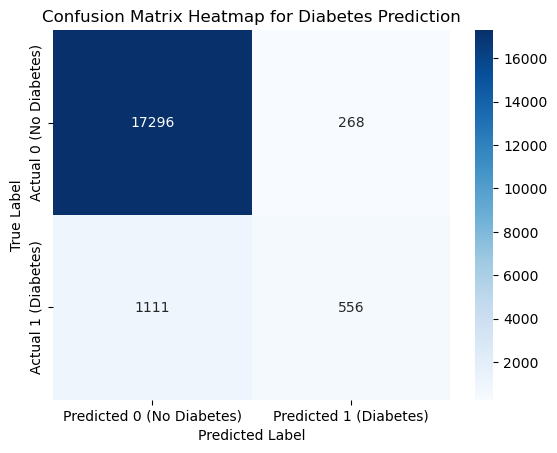

In [312]:
# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0 (No Diabetes)', 'Predicted 1 (Diabetes)'], yticklabels=['Actual 0 (No Diabetes)', 'Actual 1 (Diabetes)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for Diabetes Prediction')
plt.show()

## Model 2: Random Forest
This is a machine learning model in scikit-learn that belongs to the ensemble learning category. Specifically, it is an implementation of the random forest algorithm, which is an ensemble of decision trees.

In [313]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40)


### This line of code imports the RandomForestClassifier class from scikit-learn, allowing you to use the random forest algorithm for classification tasks.








In [314]:
# Create and fit a random forest model
# The model is configured with 100 decision trees (n_estimators=100), and the random seed is set to 42 (random_state=42).
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [315]:
# Make predictions on the test set
y_pred = model2.predict(X_test)

In [316]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [317]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9564237675934272
Confusion Matrix:
[[26036   280]
 [  977  1553]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     26316
           1       0.85      0.61      0.71      2530

    accuracy                           0.96     28846
   macro avg       0.91      0.80      0.84     28846
weighted avg       0.95      0.96      0.95     28846



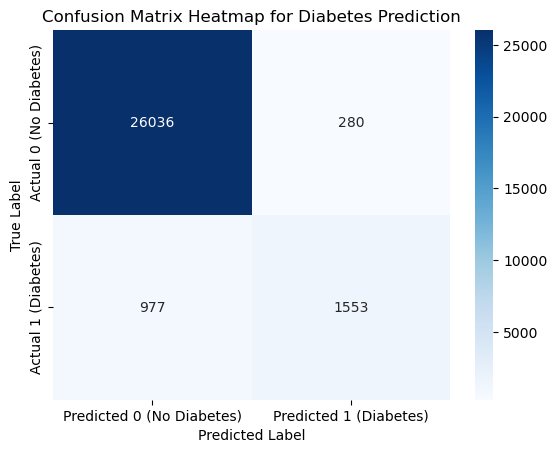

In [318]:
# Display the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0 (No Diabetes)', 'Predicted 1 (Diabetes)'], yticklabels=['Actual 0 (No Diabetes)', 'Actual 1 (Diabetes)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for Diabetes Prediction')
plt.show()

## Model 3: K-Nearest Neighbors (KNN):



In [319]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=30)

### The KNeighborsClassifier is a machine learning model used for classification tasks based on the k-nearest neighbors algorithm.

In [320]:
# Create and train the KNN model
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [321]:
# Make predictions on the test set
y_pred = model3.predict(X_test)

In [322]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [323]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9315250852816374
Confusion Matrix:
[[21567   346]
 [ 1300   825]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     21913
           1       0.70      0.39      0.50      2125

    accuracy                           0.93     24038
   macro avg       0.82      0.69      0.73     24038
weighted avg       0.92      0.93      0.92     24038



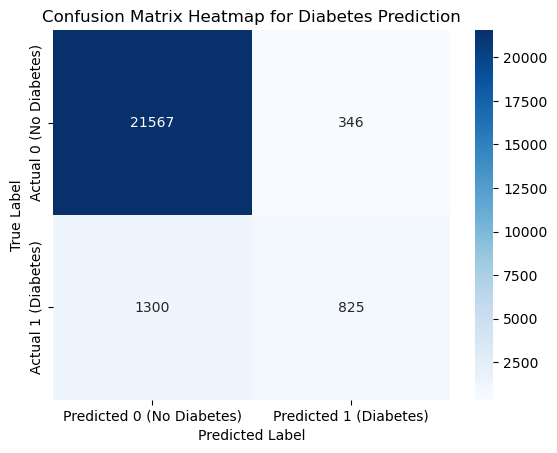

In [324]:
# Display the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0 (No Diabetes)', 'Predicted 1 (Diabetes)'], yticklabels=['Actual 0 (No Diabetes)', 'Actual 1 (Diabetes)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for Diabetes Prediction')
plt.show()

In [325]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object